In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('c:/fomo_data/model_data_1.parquet')

In [3]:
df.head()

,locationid,ridership,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,2.0,1.0,2022-02-06 15:00:00,-5.6,0.0,0.0,11.0,0.0,0.0,35.0,6.600000,331.0
1,2.0,1.0,2022-02-16 23:00:00,5.4,0.0,0.0,29.0,0.0,0.0,97.0,12.100000,280.0
2,2.0,1.0,2022-02-23 08:00:00,13.5,0.0,0.0,44.0,8.0,11.0,100.0,16.299999,227.0
3,2.0,4.0,2022-02-23 19:00:00,17.5,0.0,0.0,22.0,5.0,2.0,54.0,21.600000,184.0
4,2.0,1.0,2022-03-22 10:00:00,7.4,0.0,0.0,20.0,0.0,30.0,8.0,10.800000,127.0


In [4]:
df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['time'].dt.dayofweek
df['month'] = df['time'].dt.month
df['is_weekend'] = df['day_of_week'] >= 5
df = df.drop(columns=['time'])

In [5]:
df = df[df['month'].isin([7, 8])]
df.head()

,locationid,ridership,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),hour,day_of_week,month,is_weekend
21,2.0,1.0,28.400000,0.0,0.0,31.0,7.0,6.0,69.0,5.9,232.0,15.0,3.0,7.0,False
22,2.0,1.0,23.600000,0.0,0.0,15.0,0.0,25.0,0.0,6.4,286.0,0.0,1.0,8.0,False
23,2.0,1.0,25.299999,0.0,0.0,49.0,0.0,76.0,11.0,2.7,113.0,23.0,2.0,8.0,False
24,2.0,2.0,27.400000,0.0,0.0,10.0,0.0,16.0,0.0,5.5,169.0,15.0,4.0,8.0,False
25,2.0,1.0,25.400000,0.0,0.0,13.0,0.0,20.0,4.0,3.7,281.0,14.0,5.0,8.0,True


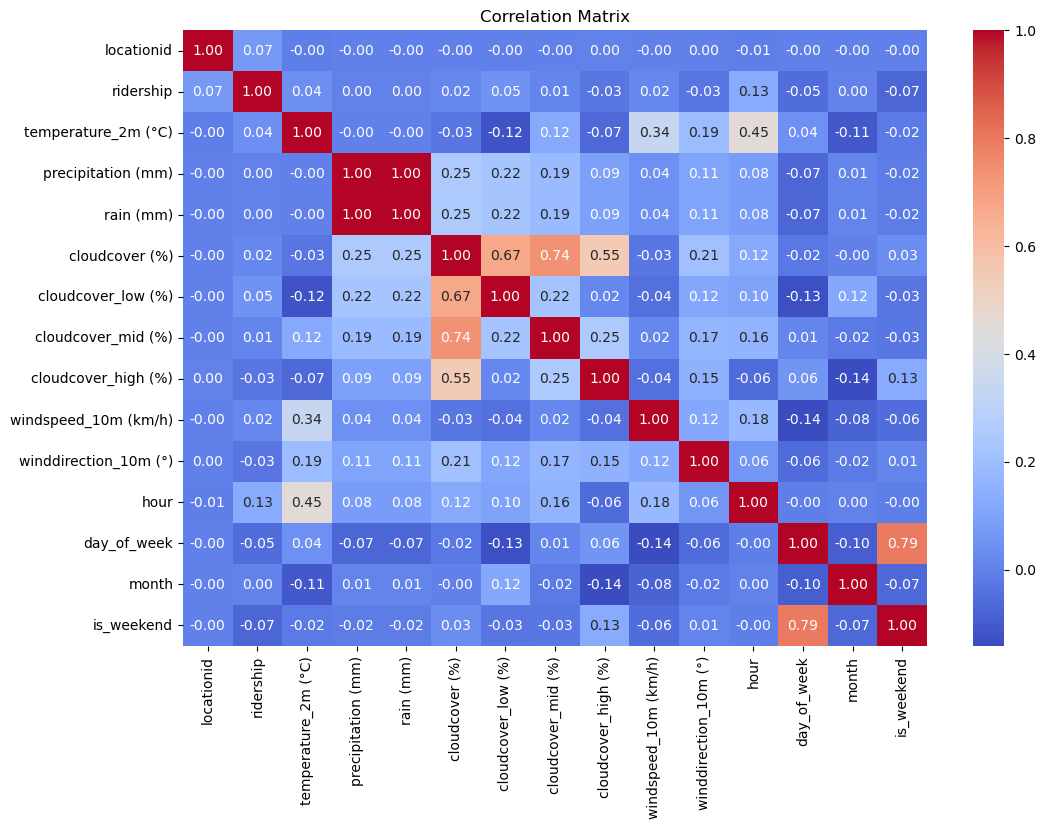

In [6]:
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [7]:
print(len(df))

294014


In [8]:
df.head()

,locationid,ridership,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),hour,day_of_week,month,is_weekend
21,2.0,1.0,28.400000,0.0,0.0,31.0,7.0,6.0,69.0,5.9,232.0,15.0,3.0,7.0,False
22,2.0,1.0,23.600000,0.0,0.0,15.0,0.0,25.0,0.0,6.4,286.0,0.0,1.0,8.0,False
23,2.0,1.0,25.299999,0.0,0.0,49.0,0.0,76.0,11.0,2.7,113.0,23.0,2.0,8.0,False
24,2.0,2.0,27.400000,0.0,0.0,10.0,0.0,16.0,0.0,5.5,169.0,15.0,4.0,8.0,False
25,2.0,1.0,25.400000,0.0,0.0,13.0,0.0,20.0,4.0,3.7,281.0,14.0,5.0,8.0,True


In [9]:
df.drop(columns=['rain (mm)', 'precipitation (mm)', 'cloudcover_low (%)', 'cloudcover (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)' ])

,locationid,ridership,temperature_2m (°C),windspeed_10m (km/h),winddirection_10m (°),hour,day_of_week,month,is_weekend
21,2.0,1.0,28.400000,5.900000,232.0,15.0,3.0,7.0,False
22,2.0,1.0,23.600000,6.400000,286.0,0.0,1.0,8.0,False
23,2.0,1.0,25.299999,2.700000,113.0,23.0,2.0,8.0,False
24,2.0,2.0,27.400000,5.500000,169.0,15.0,4.0,8.0,False
25,2.0,1.0,25.400000,3.700000,281.0,14.0,5.0,8.0,True
...,...,...,...,...,...,...,...,...,...
2136504,263.0,1077.0,28.500000,17.500000,166.0,19.0,2.0,8.0,False
2136505,263.0,759.0,28.900000,17.200001,164.0,20.0,2.0,8.0,False
2136506,263.0,685.0,28.799999,16.200001,163.0,21.0,2.0,8.0,False
2136507,263.0,601.0,27.799999,15.000000,159.0,22.0,2.0,8.0,False


In [10]:
X = df.drop(columns=['ridership'])
y = df['ridership']

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=50, random_state=10)

# Fit the model to training data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=10)

In [12]:
from sklearn.metrics import mean_squared_error
# Predict on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 86585.88205395159


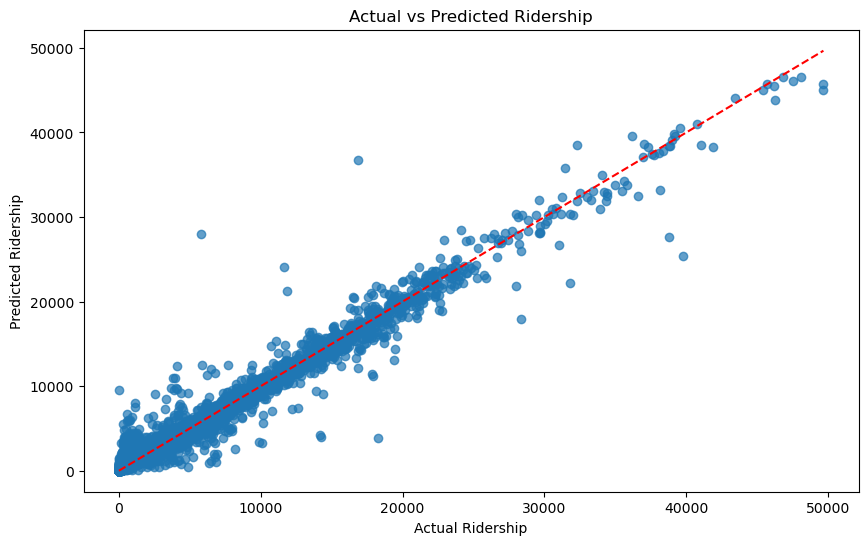

In [13]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Ridership')
plt.ylabel('Predicted Ridership')
plt.title('Actual vs Predicted Ridership')
plt.show()

In [14]:
import numpy as np
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 294.2547910467247


In [12]:
import pickle
with open('random_forest_model_july_aug.pkl', 'wb') as file:
    pickle.dump(model, file)

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

# Train and evaluate a Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [17]:
y_pred_gb = gb_model.predict(X_test)

# Calculate and print the mean squared error
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting Mean Squared Error: {mse_gb}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Gradient Boosting Mean Squared Error: 2219496.6356112114
